In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score, confusion_matrix

import matplotlib.pyplot as plt

df = pd.read_csv("/content/mushroom_cleaned.csv")
df.isna().sum()


,0
cap-diameter,0
cap-shape,0
gill-attachment,0
gill-color,0
stem-height,0
stem-width,0
stem-color,0
season,0
class,0


In [ ]:
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['class'])
y = df['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Create KNN model with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

Accuracy: 98.82%
Precision: 98.80%
Recall: 99.08%
F1 Score: 98.94%
ROC AUC Score: 0.9945755400917778


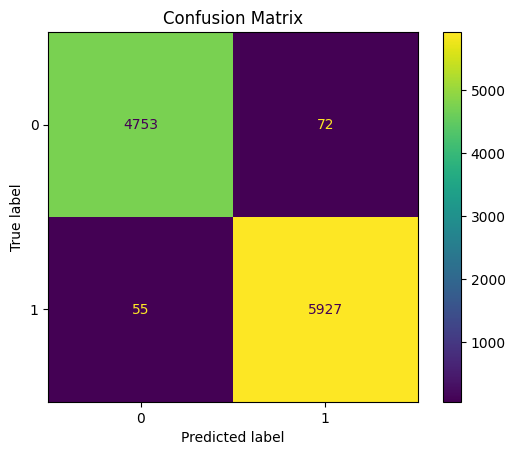

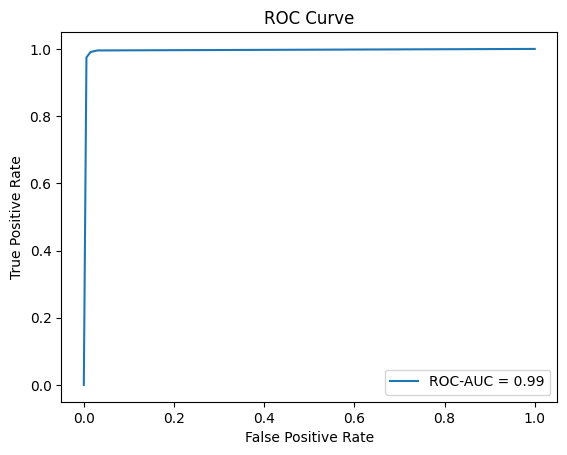

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay,roc_curve

# Predict labels for the test set
y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

precision = precision_score(y_test, y_pred)
print(f"Precision: {precision* 100:.2f}%")

recall = recall_score(y_test, y_pred)
print(f"Recall: {recall* 100:.2f}%")

f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1* 100:.2f}%")

roc_auc = roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1],multi_class='ovr')
print(f"ROC AUC Score: {roc_auc}")

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"ROC-AUC = {roc_auc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


      Metric  Accuracy  Precision    Recall  F1-Score
0  euclidean  0.987878   0.987827  0.990304  0.989064
1  manhattan  0.988063   0.987182  0.991307  0.989240
2     cosine  0.986953   0.987319  0.989134  0.988225


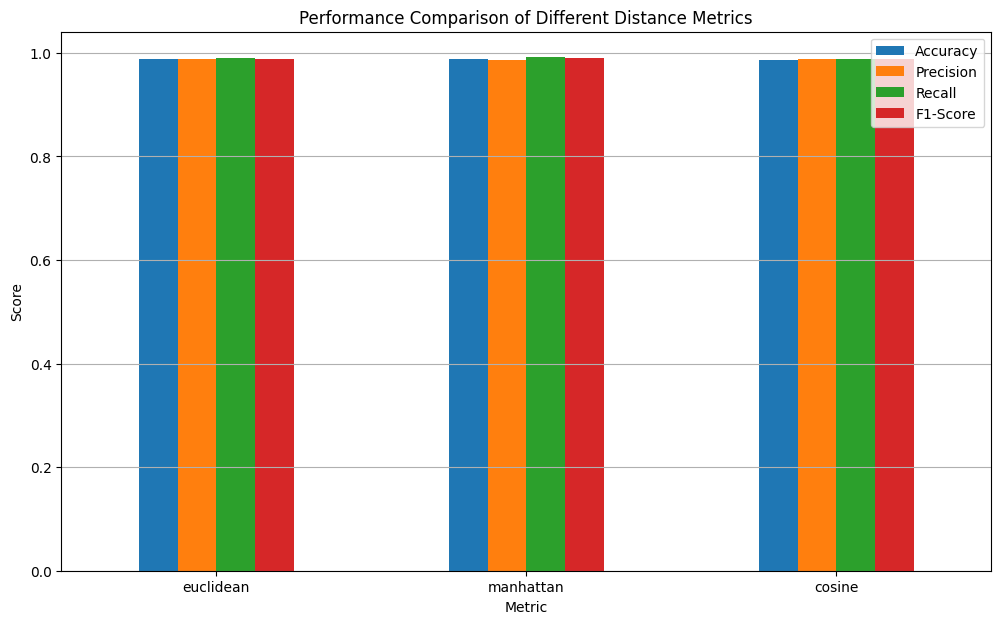

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Experiment with distance metrics
metrics = ['euclidean', 'manhattan', 'cosine']
results = []

for metric in metrics:
    knn = KNeighborsClassifier(n_neighbors=5, metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    results.append({
        'Metric': metric,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Print and plot results
print(results_df)
results_df.set_index('Metric').plot(kind='bar', figsize=(12, 7))
plt.title('Performance Comparison of Different Distance Metrics')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


Optimal value of K: 3


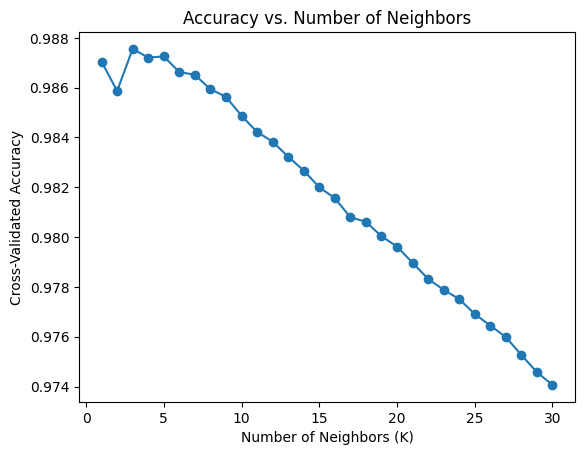

Train Accuracy: 0.99
Test Accuracy: 0.99


In [ ]:
from sklearn.model_selection import GridSearchCV


# Define the range of K values to test
param_grid = {'n_neighbors': np.arange(1, 31)}  # Test K from 1 to 30

knn = KNeighborsClassifier()

# Perform GridSearchCV with 5-fold cross-validation
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Get the best value of K
best_k = grid.best_params_['n_neighbors']
print(f"Optimal value of K: {best_k}")

# Visualize the results
results = pd.DataFrame(grid.cv_results_)
plt.plot(results['param_n_neighbors'], results['mean_test_score'], marker='o')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Accuracy vs. Number of Neighbors')
plt.show()

# Train and evaluate the best model
best_knn = grid.best_estimator_
best_knn.fit(X_train, y_train)
train_accuracy = best_knn.score(X_train, y_train)
test_accuracy = best_knn.score(X_test, y_test)
print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")


# Part 2: Logistic Regression

Accuracy: 0.6369945405755529
Precision: 0.6592420726991493
Recall: 0.7124707455700434
F1-Score: 0.6848236522856913
ROC-AUC: 0.6812390539494131


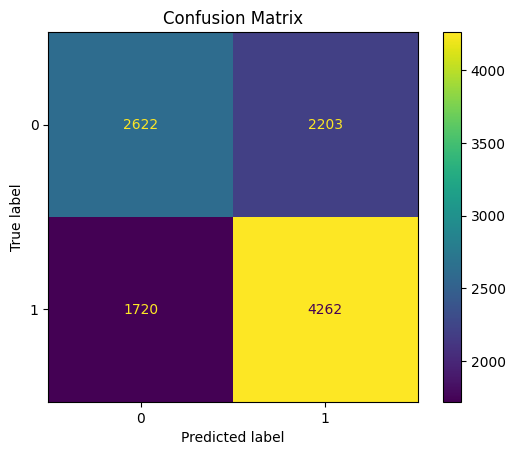

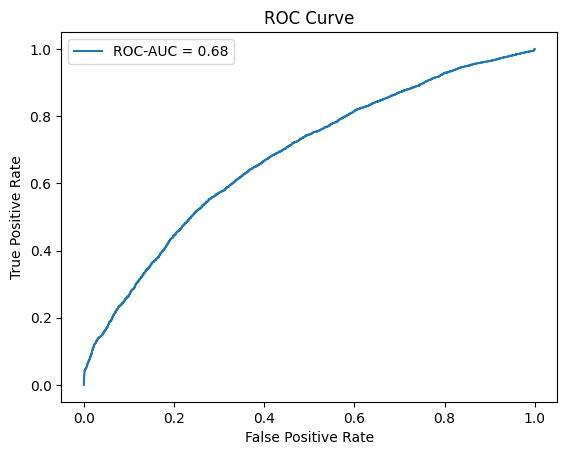

In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay, roc_curve


# Train Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict
y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:, 1]

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC-AUC: {roc_auc}")

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"ROC-AUC = {roc_auc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [ ]:
for penalty in ['l1', 'l2']:
    logreg = LogisticRegression(penalty=penalty, solver='liblinear', C=1.0)  # Use 'liblinear' for L1 regularization
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    y_prob = logreg.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    print(f"Results with {penalty} regularization:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")
    print(f"ROC-AUC: {roc_auc}\n")


Results with l1 regularization:
Accuracy: 0.6370870731933006
Precision: 0.6592947726569749
Recall: 0.7126379137412236
F1-Score: 0.6849293059125964
ROC-AUC: 0.6812399547519934

Results with l2 regularization:
Accuracy: 0.6371796058110484
Precision: 0.6593967517401392
Recall: 0.7126379137412236
F1-Score: 0.6849843335743553
ROC-AUC: 0.6812348271065355



# Part 3: Support Vector Machines (SVM)

In [ ]:
from sklearn.svm import SVC

# Initialize SVM with the default RBF kernel
svm_model = SVC(kernel='rbf', random_state=42)

# Train the SVM model
svm_model.fit(X_train, y_train)




In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

kernels = ['linear', 'poly', 'rbf']
svm_results = []

for kernel in kernels:
    # Train SVM with the specified kernel
    svm_model = SVC(kernel=kernel, random_state=42)
    svm_model.fit(X_train, y_train)

    # Predict and calculate probabilities
    y_pred = svm_model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store the results
    svm_results.append({
        'Kernel': kernel,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

# Convert results to a DataFrame
svm_results_df = pd.DataFrame(svm_results)
print(svm_results_df)


   Kernel  Accuracy  Precision    Recall  F1-Score
0  linear  0.641899   0.669068  0.698596  0.683513
1    poly  0.768206   0.787308  0.796389  0.791822
2     rbf  0.900713   0.915665  0.903878  0.909733


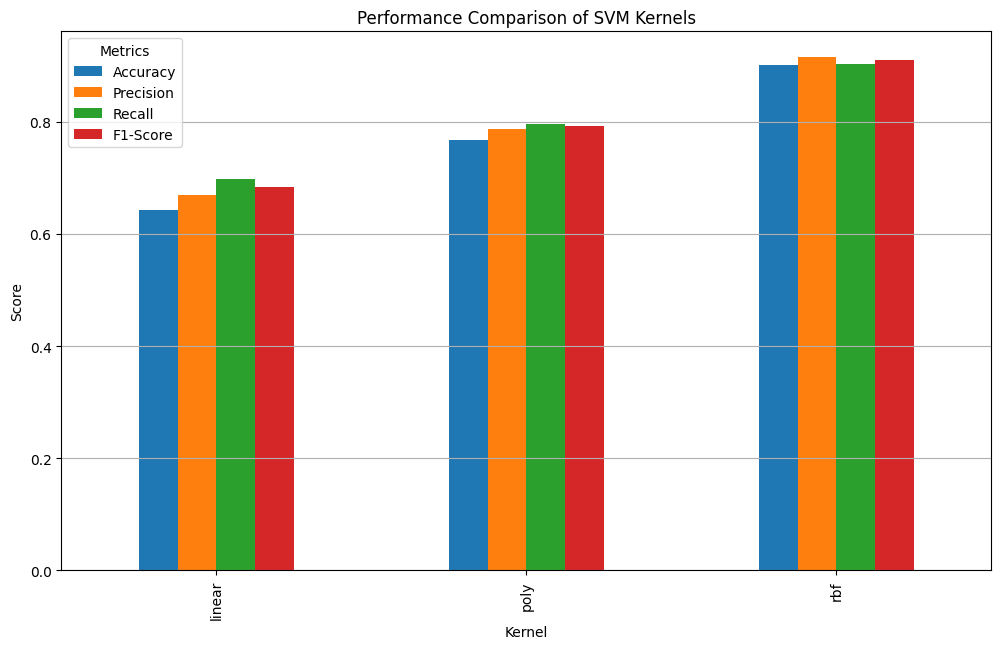

In [ ]:
import matplotlib.pyplot as plt

# Plot the metrics for each kernel
svm_results_df.set_index('Kernel').plot(kind='bar', figsize=(12, 7))
plt.title('Performance Comparison of SVM Kernels')
plt.ylabel('Score')
plt.xlabel('Kernel')
plt.legend(title='Metrics')
plt.grid(axis='y')
plt.show()


# Part 4: Ensemble Methods

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize AdaBoost
adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train AdaBoost
adaboost.fit(X_train, y_train)

# Predict and calculate probabilities
y_pred_boost = adaboost.predict(X_test)
y_prob_boost = adaboost.predict_proba(X_test)[:, 1]

# Evaluate AdaBoost
accuracy_boost = accuracy_score(y_test, y_pred_boost)
precision_boost = precision_score(y_test, y_pred_boost)
recall_boost = recall_score(y_test, y_pred_boost)
f1_boost = f1_score(y_test, y_pred_boost)
roc_auc_boost = roc_auc_score(y_test, y_prob_boost)

print(f"AdaBoost - Accuracy: {accuracy_boost:.2f}, Precision: {precision_boost:.2f}, Recall: {recall_boost:.2f}, F1-Score: {f1_boost:.2f}, ROC-AUC: {roc_auc_boost:.2f}")


AdaBoost - Accuracy: 0.69, Precision: 0.71, Recall: 0.74, F1-Score: 0.72, ROC-AUC: 0.75


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest
random_forest = RandomForestClassifier(n_estimators=50, random_state=42)

# Train Random Forest
random_forest.fit(X_train, y_train)

# Predict and calculate probabilities
y_pred_rf = random_forest.predict(X_test)
y_prob_rf = random_forest.predict_proba(X_test)[:, 1]

# Evaluate Random Forest classification metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

print(f"Random Forest - Accuracy: {accuracy_rf:.2f}, Precision: {precision_rf:.2f}, Recall: {recall_rf:.2f}, F1-Score: {f1_rf:.2f}, ROC-AUC: {roc_auc_rf:.2f}")


Random Forest - Accuracy: 0.99, Precision: 0.99, Recall: 0.99, F1-Score: 0.99, ROC-AUC: 1.00


      Metric  AdaBoost  Random Forest
0   Accuracy  0.686129       0.989081
1  Precision  0.705100       0.992111
2     Recall  0.744233       0.988131
3   F1-Score  0.724138       0.990117
4    ROC-AUC  0.747208       0.999139


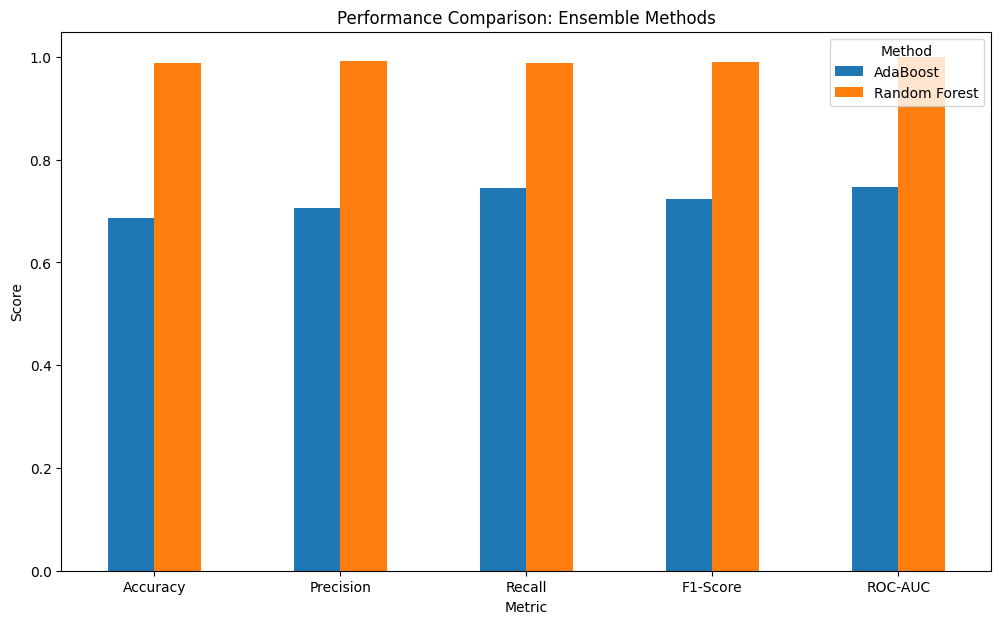

In [ ]:
ensemble_results = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"],
    "AdaBoost": [accuracy_boost, precision_boost, recall_boost, f1_boost, roc_auc_boost],
    "Random Forest": [accuracy_rf, precision_rf, recall_rf, f1_rf, roc_auc_rf]
}

# Create DataFrame
ensemble_results_df = pd.DataFrame(ensemble_results)

# Print and plot comparison
print(ensemble_results_df)
ensemble_results_df.set_index("Metric").plot(kind="bar", figsize=(12, 7))
plt.title("Performance Comparison: Ensemble Methods")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(title="Method")
plt.show()
